In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_csv_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
tr_df = pd.read_csv(train_csv_path )

In [4]:
tr_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
tr_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
tr_df.shape

(1460, 81)

In [7]:
tr_df['FireplaceQu'].isnull().sum()

690

In [8]:
tr_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
tr_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
tr_df['LotFrontage'] = tr_df['LotFrontage'].fillna(tr_df['LotFrontage'].mean())

In [12]:
tr_df.drop(['GarageYrBlt'],axis=1,inplace=True)
tr_df.drop(['YearRemodAdd'],axis=1,inplace=True)
tr_df.drop(['Alley'],axis=1,inplace=True)
tr_df.drop(['Fence'],axis=1,inplace=True)
tr_df.drop(['PoolQC'],axis=1,inplace=True)
tr_df.drop(['MiscFeature'],axis=1,inplace=True)
tr_df.drop(['Id'],axis=1,inplace=True)
tr_df.drop(['FireplaceQu'],axis=1,inplace=True)

In [13]:
tr_df.shape

(1460, 73)

In [14]:
tr_df['BsmtCond']   =tr_df['BsmtCond'].fillna(tr_df['BsmtCond'].mode()[0])
tr_df['BsmtQual']   =tr_df['BsmtQual'].fillna(tr_df['BsmtQual'].mode()[0])
tr_df['GarageType'] =tr_df['GarageType'].fillna(tr_df['GarageType'].mode()[0])
tr_df['GarageFinish']=tr_df['GarageFinish'].fillna(tr_df['GarageFinish'].mode()[0])
tr_df['GarageQual']=tr_df['GarageQual'].fillna(tr_df['GarageQual'].mode()[0])
tr_df['GarageCond']=tr_df['GarageCond'].fillna(tr_df['GarageCond'].mode()[0])
tr_df['MasVnrType']=tr_df['MasVnrType'].fillna(tr_df['MasVnrType'].mode()[0])
tr_df['MasVnrArea']=tr_df['MasVnrArea'].fillna(tr_df['MasVnrArea'].mode()[0])
tr_df['BsmtFinType2']=tr_df['BsmtFinType2'].fillna(tr_df['BsmtFinType2'].mode()[0])
tr_df['BsmtExposure']=tr_df['BsmtExposure'].fillna(tr_df['BsmtExposure'].mode()[0])

<Axes: >

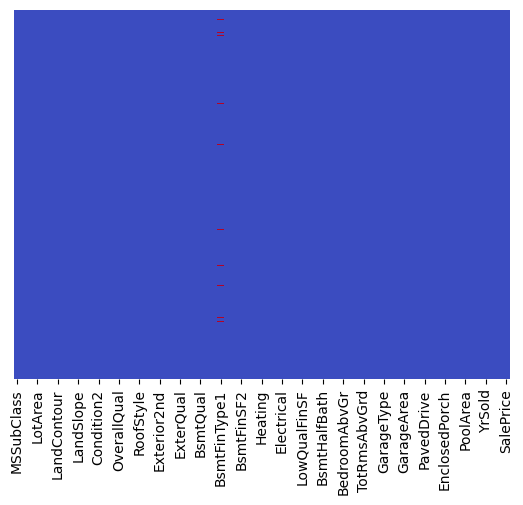

In [15]:
sns.heatmap(tr_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

All features

In [16]:
columns_heads = tr_df.columns 

In [17]:
columns3 = []
for column in columns_heads:
    in_val = tr_df[column][0]
    data_type = type(tr_df['BsmtCond'][0])
    if type(in_val) == data_type :
        columns3.append(column)

In [18]:
len(columns3)

38

In [19]:
 columns  = [
     
   'MSSubClass',
     'MSZoning',
     'LotFrontage',
     'LotArea'        
    'Street',      
   'LotShape',     
    'LandContour',   
    'Utilities',  
    'LotConfig',      
   'LandSlope',   
   'Neighborhood',      
  'Condition1','Condition2'     
   'BldgType',       
   'HouseStyle' ,    
   'OverallQual' ,      
   'OverallCond',    
   'YearBuilt',      
   'RoofStyle',      
   'RoofMatl',       
   'Exterior1st',    
   'Exterior2nd' ,   
   'MasVnrType' ,    
   'MasVnrArea',    
   'ExterQual',
   'ExterCond',
   'Foundation',
   'BsmtQual',        
   'BsmtCond',          
   'BsmtExposure' ,  
   'BsmtFinType1', 
   'BsmtFinSF1',     
   'BsmtFinType2',
   'BsmtFinSF2',
   'BsmtUnfSF'  ,
   'TotalBsmtSF' ,
   'Heating',
   'HeatingQC',
   'CentralAir',
   'Electrical', 
   '1stFlrSF', 
   '2ndFlrSF' , 
   'LowQualFinSF' ,
   'GrLivArea' ,
   'BsmtFullBath' ,
   'BsmtHalfBath',
   'FullBath' ,
   'HalfBath' ,
   'BedroomAbvGr' ,
   'KitchenAbvGr' , 
   'KitchenQual', 
   'TotRmsAbvGrd', 
   'Functional' ,
   'Fireplaces',
   'FireplaceQu',  
   'GarageType',
   'GarageFinish', 
   'GarageCars',
   'GarageArea',
   'GarageQual' ,
   'GarageCond',  
   'PavedDrive',
   'WoodDeckSF',
   'OpenPorchSF',
   'EnclosedPorch',
   '3SsnPorch',
   'ScreenPorch',
   'PoolArea', 
   'MiscVal',  
   'MoSold',
   'YrSold'  ,      
   'SaleType',       
   'SaleCondition' , 
   'SalePrice']

In [20]:
len(columns)

72

Categorical features

In [21]:
columns2=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
#           'FireplaceQu' removed due to less val in test
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [22]:
len(columns2)

38

In [23]:
difference  = list(set(columns2)-set(columns3))
print(difference)

[]


In [24]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)#we concat all the categorical features that we have new val for
        
    return df_final

In [25]:
main_df=tr_df.copy()

# **TEST DATA**

In [26]:
test_csv_path = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'
ts_df = pd.read_csv(test_csv_path)

In [27]:
ts_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<Axes: >

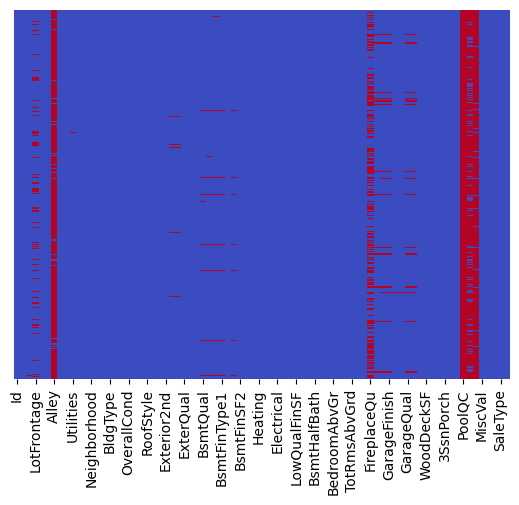

In [28]:
sns.heatmap(ts_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [29]:
ts_df.drop(['FireplaceQu'],axis=1,inplace=True)
ts_df.drop(['GarageYrBlt'],axis=1,inplace=True)
ts_df.drop(['YearRemodAdd'],axis=1,inplace=True)
ts_df.drop(['Alley'],axis=1,inplace=True)
ts_df.drop(['Fence'],axis=1,inplace=True)
ts_df.drop(['PoolQC'],axis=1,inplace=True)
ts_df.drop(['MiscFeature'],axis=1,inplace=True)
ts_df.drop(['Id'],axis=1,inplace=True)

In [30]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  RoofStyl

In [31]:
ts_df['Exterior2nd']   =ts_df['Exterior2nd'].fillna(ts_df['Exterior2nd'].mode()[0])
ts_df['BsmtQual']   =tr_df['BsmtQual'].fillna(ts_df['BsmtQual'].mode()[0])
ts_df['BsmtCond']   =tr_df['BsmtQual'].fillna(ts_df['BsmtQual'].mode()[0])
ts_df['BsmtFinType1']   =ts_df['BsmtFinType1'].fillna(ts_df['BsmtFinType1'].mode()[0])
ts_df['BsmtFinType2']   =ts_df['BsmtFinType2'].fillna(ts_df['BsmtFinType2'].mode()[0])
ts_df['BsmtExposure']   =ts_df['BsmtExposure'].fillna(ts_df['BsmtExposure'].mode()[0])
ts_df['GarageFinish']   =ts_df['GarageFinish'].fillna(ts_df['GarageFinish'].mode()[0])
ts_df['GarageQual']   =tr_df['GarageQual'].fillna(ts_df['GarageQual'].mode()[0])
ts_df['GarageCond']   =tr_df['GarageCond'].fillna(ts_df['GarageCond'].mode()[0])
ts_df['Foundation']   =tr_df['Foundation'].fillna(ts_df['Foundation'].mode()[0])
ts_df['GarageType']   =tr_df['GarageType'].fillna(ts_df['GarageType'].mode()[0])
ts_df['MasVnrType']   =tr_df['MasVnrType'].fillna(ts_df['MasVnrType'].mode()[0])
# ts_df['FirePlaces']   =tr_df['FirePlaces'].fillna(ts_df['FirePlaces'].mean())
ts_df['LotFrontage']   =ts_df['LotFrontage'].fillna(ts_df['LotFrontage'].mean())
# ts_df['BsmtFinSF2']   =ts_df['BsmtFinSF2'].fillna(ts_df['BsmtFinSF2'].mean())
ts_df['MSSubClass']   =ts_df['MSSubClass'].fillna(ts_df['MSSubClass'].mean())
ts_df['GarageArea']   =ts_df['GarageArea'].fillna(ts_df['GarageArea'].mean())
ts_df['MasVnrArea']   =ts_df['MasVnrArea'].fillna(ts_df['MasVnrArea'].mean())

<Axes: >

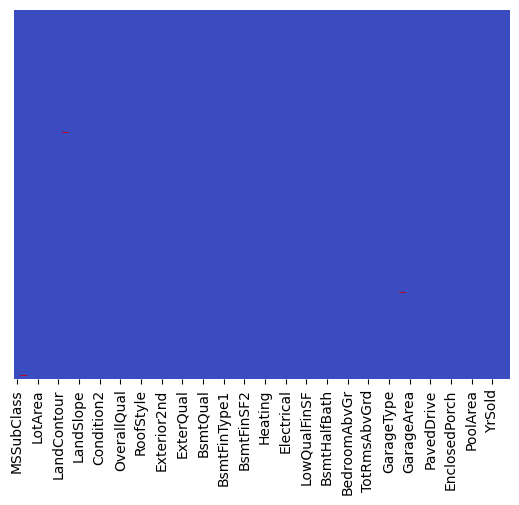

In [32]:
sns.heatmap(ts_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [37]:
# [LotFrontage, "float" ,Exterior2nd , BstmQual ,BstmFinType1 ,BstmFinSF2 ,GarageFinish ,GarageQual ]

NameError: name 'LotFrontage' is not defined

In [38]:
dif = list(set(tr_df)-set(columns))
print(dif)

['Street', 'Condition2', 'LotArea', 'BldgType']


In [39]:
final_df = pd.concat([tr_df,ts_df], axis = 0 )

In [40]:
final_df.shape

(2919, 73)

In [41]:
final_df = category_onehot_multcols(columns2)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [42]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,60,65.0,8450,7,5,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,1,0,1
1,20,80.0,9600,6,8,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,1,0,1
2,60,68.0,11250,7,5,2001,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,1,0,1
3,70,60.0,9550,7,5,1915,0.0,216.0,0.0,540.0,...,0,0,0,1,0,0,0,1,0,1
4,60,84.0,14260,8,5,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,1,0,1


In [52]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [53]:
final_df.shape

(2919, 175)

In [54]:
df_train_final = final_df.iloc[:1422,:]
df_test_final = final_df.iloc[1422:,:]

In [55]:
df_test_final.drop(['SalePrice'], axis = 1 , inplace = True)

/tmp/ipykernel_32/998849479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final.drop(['SalePrice'], axis = 1 , inplace = True)


In [56]:
df_train_final.shape

(1422, 175)

In [57]:
df_test_final.shape

(1497, 174)

In [58]:
X_train = df_train_final.drop(['SalePrice'] , axis =1 )
Y_train = df_train_final['SalePrice']

In [69]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
import pickle
filename = 'hs_Pr_pred_model.pkl'
pickle.dump(classifier, open(filename , 'wb'))

In [70]:
y_pred = classifier.predict(df_test_final) 

In [81]:
y_pred.shape

(1497,)

In [82]:
sub_df.shape

(1497, 2)

In [83]:
sub_df

,Id,SalePrice
0,1461.0,140817.72
1,1462.0,206426.64
2,1463.0,137454.92
3,1464.0,148926.34
4,1465.0,253156.22
...,...,...
1492,NaN,90903.14
1493,NaN,77642.42
1494,NaN,166688.64
1495,NaN,114337.85


In [109]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
# datasets.to_csv('/kaggle/working/sample_submission.csv',index=False)

In [110]:
print(datasets[datasets['Id'] == 'NaN']) 

Empty DataFrame
Columns: [Id, SalePrice]
Index: []


In [111]:
datasets.dropna(inplace=True)

In [112]:
datasets['Id'] = datasets['Id'].astype(int)

In [114]:
type(datasets['Id'][0])

numpy.int64

In [115]:
datasets.to_csv('/kaggle/working/sample_submission.csv',index=False)

In [116]:
datasets

,Id,SalePrice
0,1461,140817.718750
1,1462,206426.640625
2,1463,137454.921875
3,1464,148926.343750
4,1465,253156.218750
...,...,...
1454,2915,156698.593750
1455,2916,190655.468750
1456,2917,147979.781250
1457,2918,90544.398438
